# Time series visualization using Pandas

## Importing packages
The necessary packages to perform the visualizations are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data
The time series data used is the McDonalds data. It has 3 columns: Date, adjusted close and adjusted volume. We will name the rows according to the date and have the other 2 as columns.

In [3]:
data = pd.read_csv('time_data.csv', index_col='Date', parse_dates=True)

In [4]:
data.head()

,Adj. Close,Adj. Volume
Date,,
1970-01-02,0.209761,2825604.0
1970-01-05,0.213316,2210449.5
1970-01-06,0.214501,1951168.5
1970-01-07,0.213316,2728768.5
1970-01-08,0.213316,2242404.0


## Plotting

Here the adjusted close and adjusted volume are on two different scales. So of we directly plot it, we won't get much insights.

<AxesSubplot:xlabel='Date'>

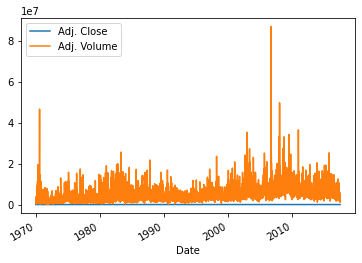

In [5]:
data.plot()

To avoid this, consider only one column and plot it.

<AxesSubplot:xlabel='Date'>

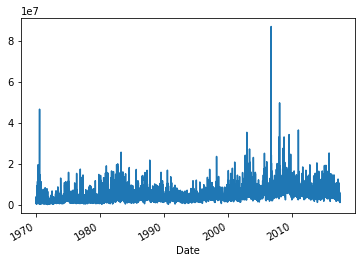

In [6]:
data['Adj. Volume'].plot()

<AxesSubplot:xlabel='Date'>

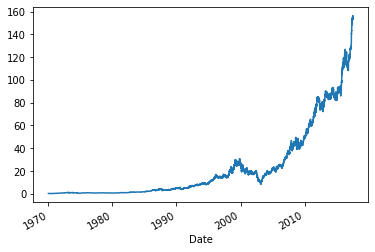

In [7]:
data['Adj. Close'].plot()

Futher the plot can be customised to show only a range of values. Just in case one wants to look into the data of april 2000 to april 2003, then accordingly the limits can be set. 

<AxesSubplot:xlabel='Date'>

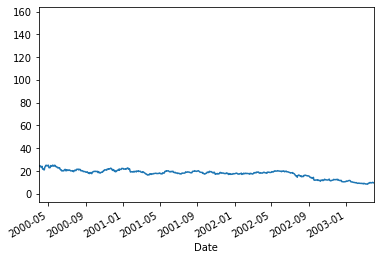

In [17]:
data['Adj. Close'].plot(xlim=['2000-04-01','2003-04-01'])

In the above plot, you can see that the x limit has been adjusted, but the y limit is the same. You can adjust the y limit too.

<AxesSubplot:xlabel='Date'>

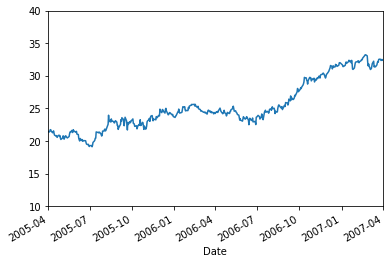

In [20]:
data['Adj. Close'].plot(xlim=['2005-04-01','2007-04-01'],ylim=(10,40))

When dealing with time series data, usually the time is on the x axis and formatted. Incase it is not in the form you need to work with then matplotlib's submodule needs to be used.

In [21]:
import matplotlib.dates as dates

Now suppose you wanted the x axis to be daily ticks or weekly ticks or maybe both. So the following is done. First we grab the index we are concerned with.

In [22]:
indx = data.loc['2005-04-01':'2005-06-01'].index
indx

DatetimeIndex(['2005-04-01', '2005-04-04', '2005-04-05', '2005-04-06',
               '2005-04-07', '2005-04-08', '2005-04-11', '2005-04-12',
               '2005-04-13', '2005-04-14', '2005-04-15', '2005-04-18',
               '2005-04-19', '2005-04-20', '2005-04-21', '2005-04-22',
               '2005-04-25', '2005-04-26', '2005-04-27', '2005-04-28',
               '2005-04-29', '2005-05-02', '2005-05-03', '2005-05-04',
               '2005-05-05', '2005-05-06', '2005-05-09', '2005-05-10',
               '2005-05-11', '2005-05-12', '2005-05-13', '2005-05-16',
               '2005-05-17', '2005-05-18', '2005-05-19', '2005-05-20',
               '2005-05-23', '2005-05-24', '2005-05-25', '2005-05-26',
               '2005-05-27', '2005-05-31', '2005-06-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

Next we grab the corresponding data values for the index.

In [23]:
value = data.loc['2005-04-01':'2005-06-01']['Adj. Close']
value

Date
2005-04-01    21.415836
2005-04-04    21.408927
2005-04-05    21.560911
2005-04-06    21.754344
2005-04-07    21.740527
2005-04-08    21.512552
2005-04-11    21.277669
2005-04-12    21.346752
2005-04-13    21.567819
2005-04-14    21.250035
2005-04-15    20.932252
2005-04-18    20.794085
2005-04-19    20.849352
2005-04-20    20.683552
2005-04-21    20.573019
2005-04-22    20.766452
2005-04-25    20.918435
2005-04-26    20.725002
2005-04-27    20.835535
2005-04-28    20.455577
2005-04-29    20.248327
2005-05-02    20.427944
2005-05-03    20.586835
2005-05-04    20.814810
2005-05-05    20.683552
2005-05-06    20.296685
2005-05-09    20.807902
2005-05-10    20.794085
2005-05-11    20.621377
2005-05-12    20.573019
2005-05-13    20.483210
2005-05-16    20.642102
2005-05-17    20.704277
2005-05-18    21.125685
2005-05-19    21.395111
2005-05-20    21.374386
2005-05-23    21.636902
2005-05-24    21.326027
2005-05-25    21.339844
2005-05-26    21.747436
2005-05-27    21.595452
2005-05-31 

Now using the index and value, we can plot. But here we will use the function 'plot_date' to let matplotlib know that what we are plotting is the dates.

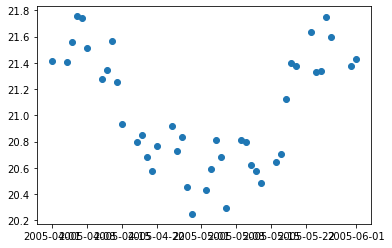

In [24]:
fig,ax = plt.subplots()
ax.plot_date(indx,value)

A scatter plot is generated but we need a line plot so the marker type has to be mentioned. Moreover, the x axis labels are overlapping, to avoid that you need to call the function 'autofmt_xdate()' to automatically format the xdate axis. For more customization, if the grid lines are need for the y axis or x axis, the argument can be mentioned as true, as shown below.

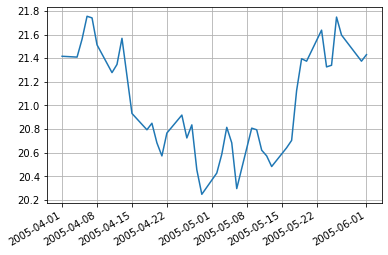

In [26]:
fig,ax = plt.subplots()
ax.plot_date(indx,value,'-')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

fig.autofmt_xdate()

Now we have understood, how to plot according to dates. Now to plot according to months, we need to set the major and minor locator and major and minor formatter. The locator are of months, weekday and year. After locating the month, we will mention how to format it. The formatting is given in the parenthesis. %b means half month name and %Y means year. In the formatting, we can add line breaks so as to fit the minor axis. While menioning the weekday locator, we can give which weekday to consider. 0- monday, 1- tuesday and so on. By deafult it is tuesday.

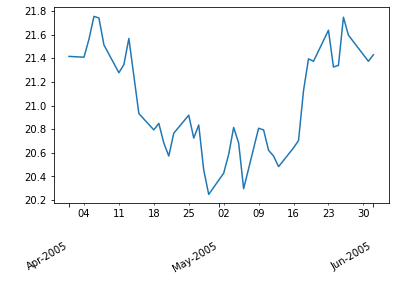

In [29]:
fig,ax = plt.subplots()
ax.plot_date(indx,value,'-')

# Major Locating
ax.xaxis.set_major_locator(dates.MonthLocator())
# Major Formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b-%Y'))

# Minor Locating
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
# Minor Formatting
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

fig.autofmt_xdate()

A small tip, if you want to make these plottings interactive. Instead of mentioning the magic function '%matplotlib inline', restart the kernel and mention the magic function '%matplotlib notebook'.